# Assignment 6: Classification

The objective of this assignment is to give you experience with classification using discriminant analysis and multiple logistic regression.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df_train = pd.read_csv("Shiva_train.csv")
df_test = pd.read_csv("Shiva_test.csv")

Use the training data `df_train` to create a data frame of independent variables `X_train` and a dependent variable column `y_train` of the measure of customer loyalty.  Do the same for the testing data `df_test`.

In [2]:

X_train=df_train.iloc[:,1:10]
y_train=df_train.iloc[:,10]
X_test=df_test.iloc[:,1:10]
y_test=df_test.iloc[:,10]

Calculate F-scores for each of the independent variables.  What does this tell us about what features to use in classifying customers?  Based on these results, should you modify the specification of training data?  Why or why not?

In [3]:
print(' Variable\t  F-score\t    P > F\n', '-'*45)
for iv in list(X_train.columns):
    f_score = stats.f_oneway(X_train[iv][y_train == 1], 
                   X_train[iv][y_train == 2], 
                   X_train[iv][y_train == 3])
    print(' ' + '\t'.join([iv.ljust(7)] + \
                                [("%.4f" % x).rjust(10) for x in [f_score.statistic, f_score.pvalue]]))

 Variable	  F-score	    P > F
 ---------------------------------------------
 Ads    	  225.7171	    0.0000
 Price  	  834.2816	    0.0000
 Place  	  644.2620	    0.0000
 F_Quali	  164.1339	    0.0000
 S_Quali	  257.1569	    0.0000
 Varie  	  419.3651	    0.0000
 S_scape	  171.6483	    0.0000
 P_Faci 	  314.2736	    0.0000
 Gifts  	  314.4948	    0.0000


You are now ready to fit your models with `X_train` and `y_train`!  Then, use `X_test` to make loyalty predicitions for the individuals in the test data.  You'll want to generate crosstabs of the test observations `y_test` and the predicited values.

#### a. Linear Discriminant Analysis 

In [4]:
model1=LinearDiscriminantAnalysis()
model1.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [6]:
results=pd.DataFrame({'predictions': model1.predict(X_test),
                     'observations': y_test})
pd.crosstab(results.observations, results.predictions)

predictions,1,2,3
observations,,,
1,15,5,0
2,1,37,1
3,0,0,41


In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, results.predictions)

0.93

In [10]:
#misclassified customers
misclassified_samples1 =df_test[results.predictions!=results.observations]
misclassified_samples1.insert(loc=11,column='predict Loyalty', value=results.predictions[results.predictions!=results.observations])
misclassified_samples1

,ID,Ads,Price,Place,F_Quali,S_Quali,Varie,S_scape,P_Faci,Gifts,Loyalty,predict Loyalty
29,150,2,1,1,1,2,1,1,1,1,1,2
31,160,1,1,1,1,1,1,1,1,1,1,2
32,161,1,1,1,1,2,1,1,1,1,1,2
36,181,2,3,3,2,2,2,2,2,2,2,3
42,211,3,3,3,4,4,3,4,3,3,1,2
46,231,1,1,1,2,2,2,2,2,2,2,1
52,261,3,3,3,4,4,3,4,3,3,1,2


#### b. Multinomial Logistic Regression 

In [9]:
model2=LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train,y_train)
results1=pd.DataFrame({'predictions': model2.predict(X_test),
                      'probability': model2.predict_proba(X_test)[:,1],
                     'observations': y_test})
pd.crosstab(results1.observations, results1.predictions)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


predictions,1,2,3
observations,,,
1,18,2,0
2,0,17,22
3,0,0,41


In [38]:
accuracy_score(y_test, results1.predictions)

0.76

In [39]:
#misclassified customers
misclassified_samples2 =df_test[results1.predictions!=results1.observations]
misclassified_samples2.insert(loc=11,column='predict Loyalty', value=results1.predictions[results1.predictions!=results1.observations])
misclassified_samples2

,ID,Ads,Price,Place,F_Quali,S_Quali,Varie,S_scape,P_Faci,Gifts,Loyalty,predict Loyalty
1,10,4,4,4,5,5,4,5,4,4,2,3
3,20,4,4,4,5,5,4,5,4,4,2,3
5,30,4,4,4,5,5,4,5,4,4,2,3
7,40,4,4,4,5,5,4,5,4,4,2,3
9,50,4,4,4,5,5,4,5,4,4,2,3
11,60,4,4,4,5,5,4,5,4,4,2,3
13,70,4,4,4,5,5,4,5,4,4,2,3
15,80,4,4,4,5,5,4,5,4,4,2,3
17,90,4,4,4,5,5,4,5,4,4,2,3
21,110,4,4,4,5,5,4,5,4,4,2,3


#### c. Decision Tree 

In [40]:
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score

In [41]:
model3= sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=4)
model3=model3.fit(X_train,y_train)
results2=pd.DataFrame({'predictions': model3.predict(X_test),
                     'observations': y_test})
pd.crosstab(results2.observations, results2.predictions)

predictions,1,2,3
observations,,,
1,20,0,0
2,0,39,0
3,0,0,41


In [12]:
accuracy_score(y_test, results2.predictions)

1.0

In [42]:
#misclassified customers
misclassified_samples3 =df_test[results2.predictions!=results2.observations]
misclassified_samples3.insert(loc=11,column='predict Loyalty', value=results2.predictions[results2.predictions!=results2.observations])
misclassified_samples3

,ID,Ads,Price,Place,F_Quali,S_Quali,Varie,S_scape,P_Faci,Gifts,Loyalty,predict Loyalty


#### For the LDA model, visualize the cluster means and coefficients for each group of customers.

In [43]:
import seaborn as sns

In [44]:
#creating a dataframe for coefficient
LDAcoef=pd.DataFrame(model1.coef_).transpose()
LDAcoef.columns = ['1','2','3']
LDAcoef.insert(loc=0,column='variable', value=X_train.columns)

#creating a dataframe for means
LDAmean=pd.DataFrame(model1.means_).transpose()
LDAmean.columns = ['1','2','3']
LDAmean.insert(loc=0,column='variable', value=X_train.columns)

In [50]:
#variance of means for each variable
LDAmean.iloc[:,1:4].apply(np.std,axis=1)

0    0.861906
1    1.445863
2    1.295783
3    0.869035
4    0.937443
5    1.183599
6    0.880932
7    1.076274
8    1.065330
dtype: float64

Text(0,0.5,'Coefficients')

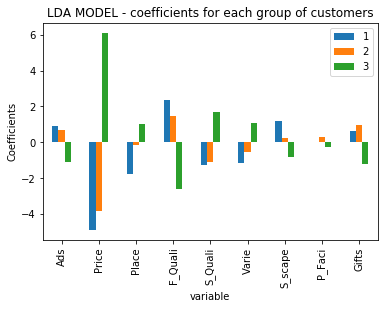

In [33]:
LDAcoef.plot(x="variable", y=["1", "2", "3"], kind="bar")
plt.title('LDA MODEL - coefficients for each group of customers')
plt.ylabel('Coefficients')

Text(0,0.5,'Means')

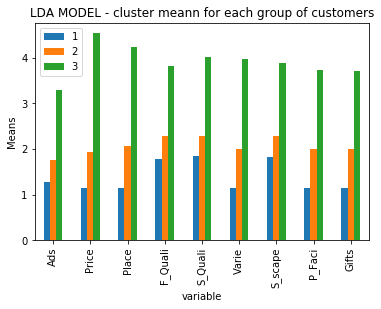

In [34]:
LDAmean.plot(x="variable", y=["1", "2", "3"], kind="bar")
plt.title('LDA MODEL - cluster meann for each group of customers')
plt.ylabel('Means')

#### For the multinomial logistic regression model, plot the coefficients by group.

In [17]:
LRcoef=pd.DataFrame(model2.coef_).transpose()
LRcoef.columns = ['1','2','3']
LRcoef.insert(loc=0,column='variable', value=X_train.columns)

Text(0,0.5,'Coefficients')

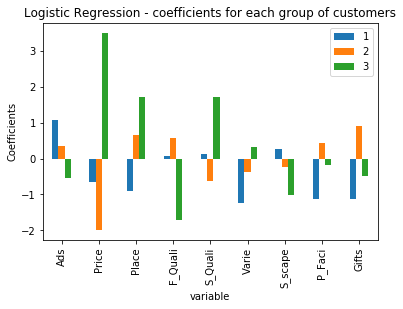

In [35]:
LRcoef.plot(x="variable", y=["1", "2", "3"], kind="bar")
plt.title('Logistic Regression - coefficients for each group of customers')
plt.ylabel('Coefficients')

#### Create a tree visualization of the decision tree

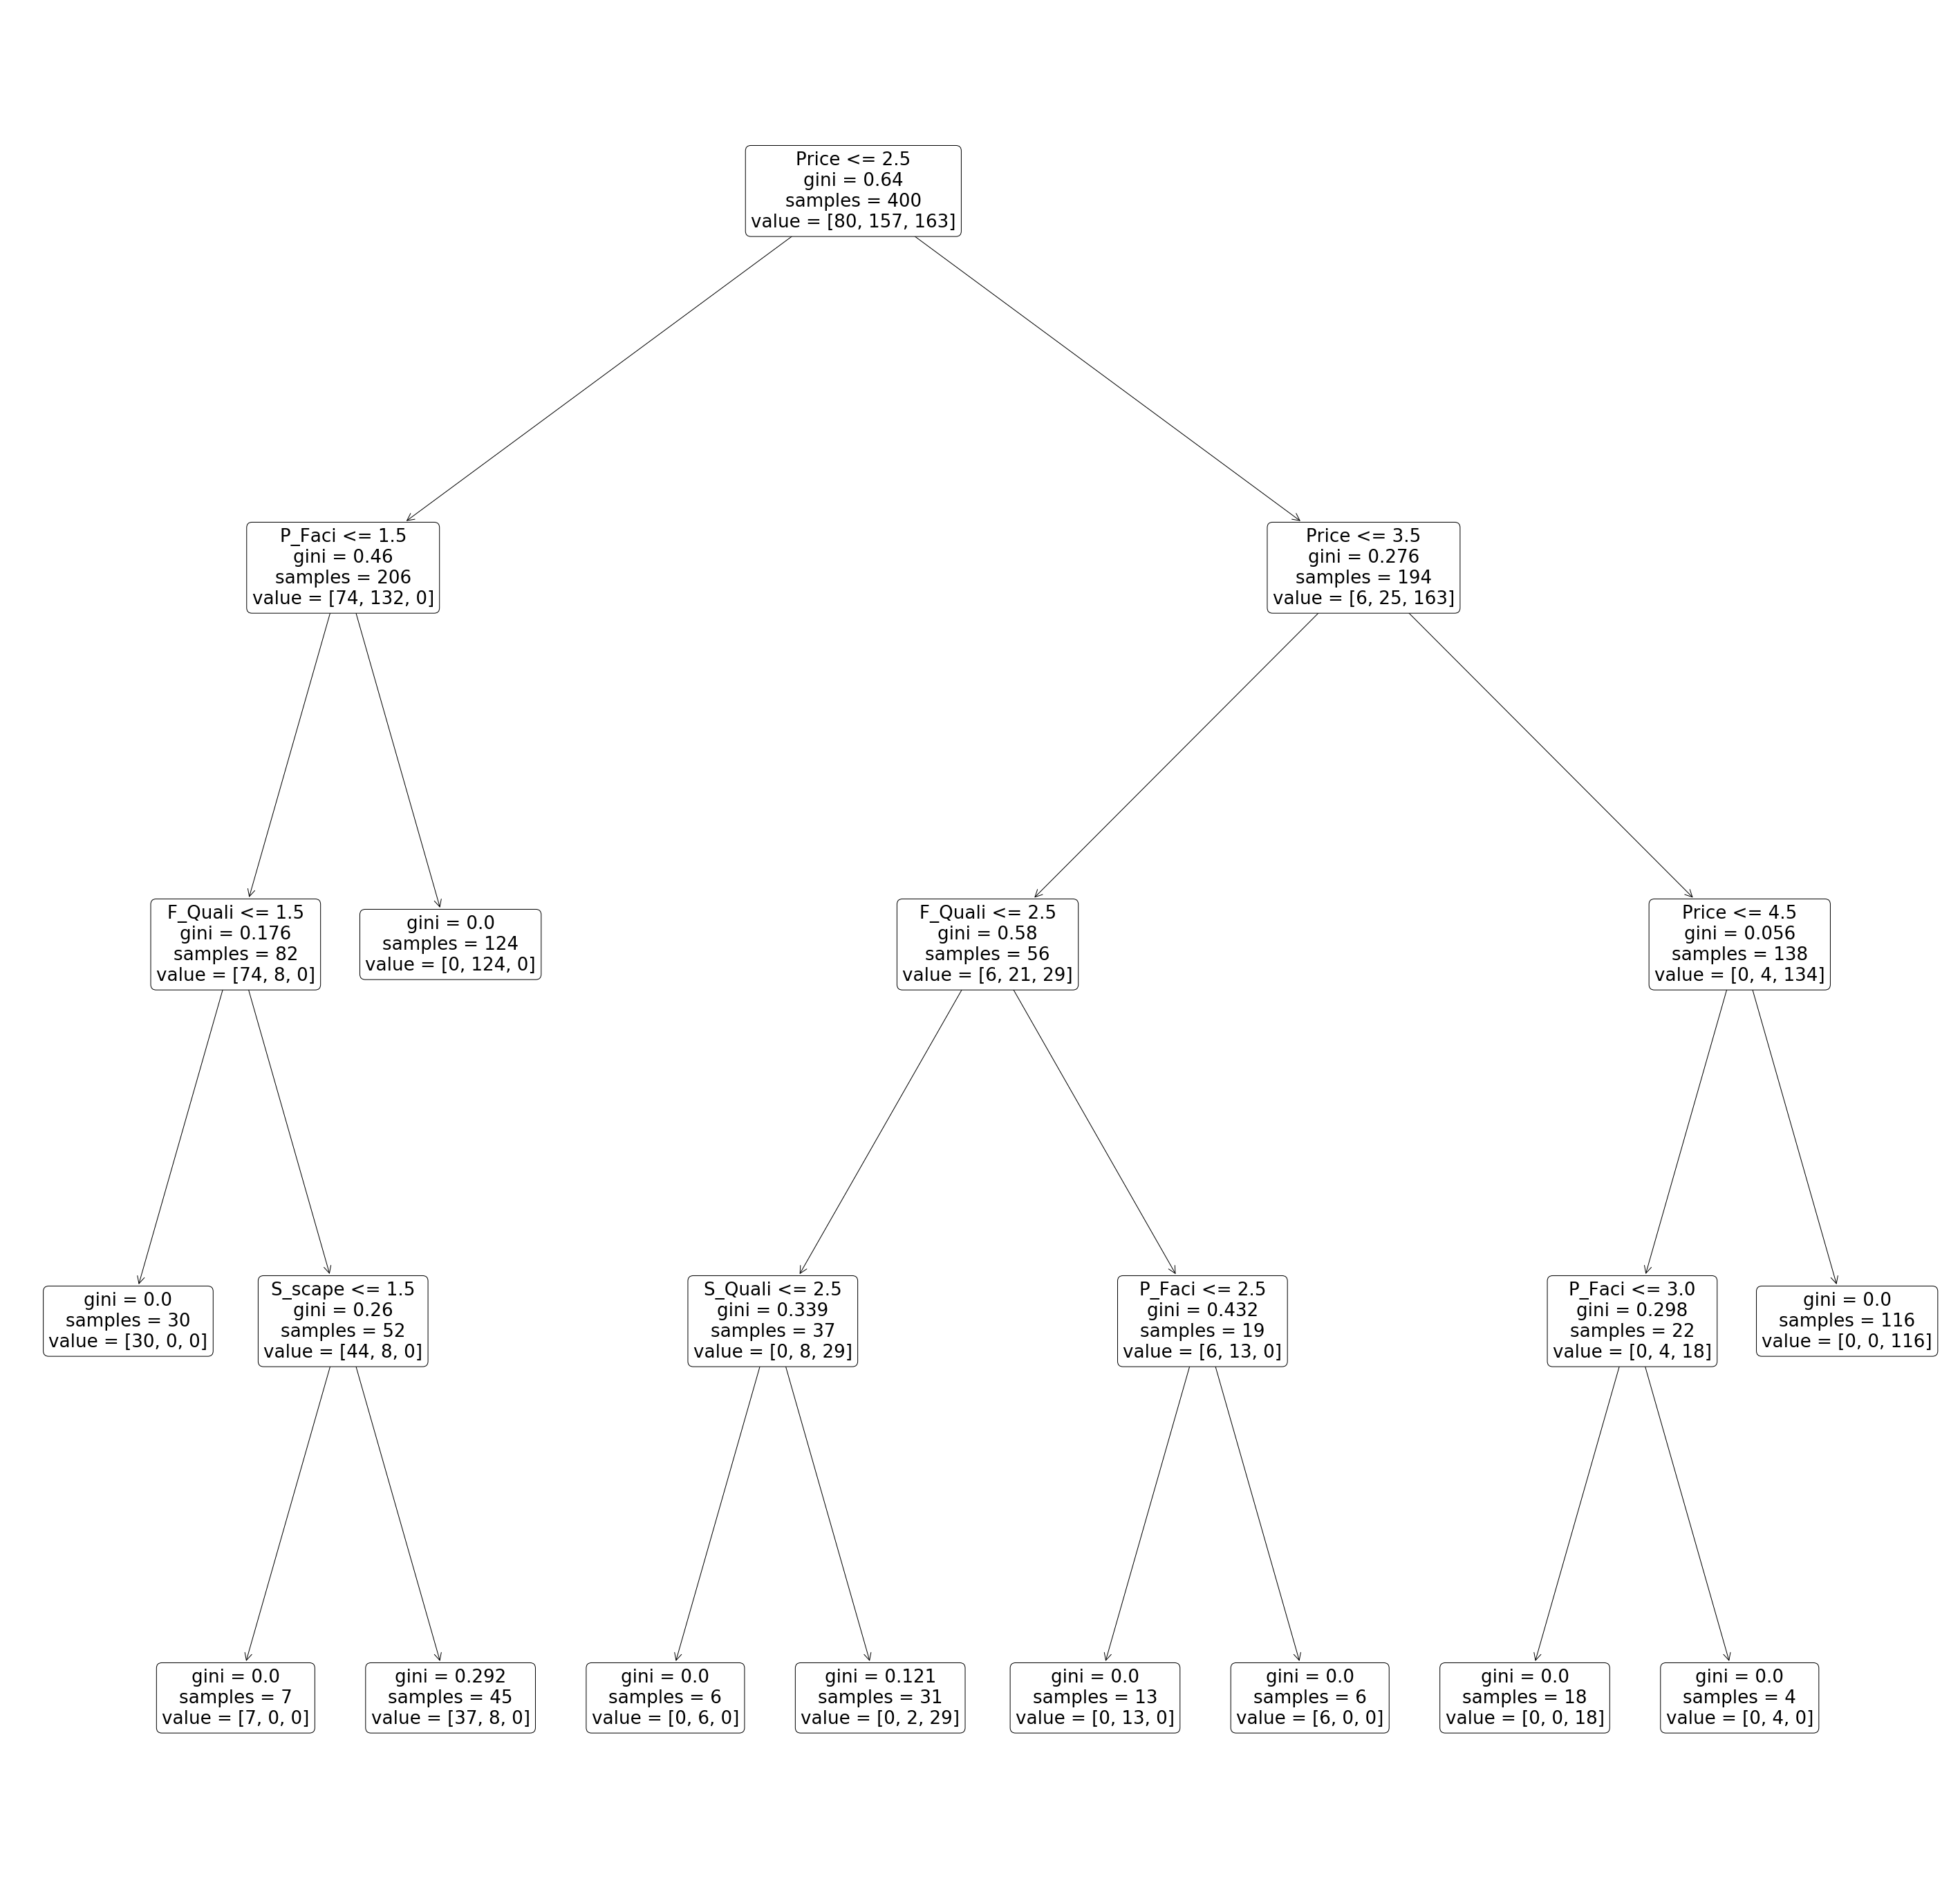

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50,50))
sklearn.tree.plot_tree(model3,feature_names=X_train.columns, label='all',rounded=True)
plt.show()

From the graph above, we see that Price is at the top node of the decision tree model. Price is most important factor in segmenting Shiva’s customer base – differentiating customers based on the variable price creates groups that are very similar to each other while being different across group.  

The second most important variable in this context in differentiating between customers is Parking facility followed by food quality

In [54]:
#giving suggestion for question9
df_train.iloc[:,2:11].groupby('Loyalty').mean()

,Price,Place,F_Quali,S_Quali,Varie,S_scape,P_Faci,Gifts
Loyalty,,,,,,,,
1,1.150000,1.150000,1.775000,1.837500,1.15000,1.825000,1.150000,1.150000
2,1.936306,2.063694,2.292994,2.286624,2.00000,2.273885,2.000000,2.000000
3,4.533742,4.239264,3.822086,4.012270,3.97546,3.877301,3.736196,3.711656
